# EDA on CBIS-DDSM Breast Cancer Dataset

##### Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_calc = pd.read_csv("/home/suman/Downloads/Red/archive/k_CBIS-DDSM/calc_case(with_jpg_img).csv")
df_mass = pd.read_csv("/home/suman/Downloads/Red/archive/k_CBIS-DDSM/mass_case(with_jpg_img).csv")

In [3]:
df_all_cases = pd.concat([df_calc, df_mass], axis=0)
df_all_cases.sample(12)

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,jpg_fullMammo_img_path,jpg_crop_img_path,jpg_ROI_img_path,breast_density,mass shape,mass margins
28,P_00014,4.0,LEFT,MLO,1,calcification,PLEOMORPHIC,CLUSTERED,4,MALIGNANT,4,jpg_img/Calc_Training_P_00014_LEFT_MLO-1.3.6.1...,jpg_img/Calc_Training_P_00014_LEFT_MLO_1-1.3.6...,jpg_img/Calc_Training_P_00014_LEFT_MLO_1-1.3.6...,NaN,NaN,NaN
1618,P_00402,3.0,RIGHT,MLO,1,calcification,ROUND_AND_REGULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,4,jpg_img/Calc_Test_P_00402_RIGHT_MLO-1.3.6.1.4....,jpg_img/Calc_Test_P_00402_RIGHT_MLO_1-1.3.6.1....,jpg_img/Calc_Test_P_00402_RIGHT_MLO_1-1.3.6.1....,NaN,NaN,NaN
608,P_00870,NaN,LEFT,CC,1,mass,NaN,NaN,5,MALIGNANT,5,jpg_img/Mass_Training_P_00870_LEFT_CC-1.3.6.1....,jpg_img/Mass_Training_P_00870_LEFT_CC_1-1.3.6....,jpg_img/Mass_Training_P_00870_LEFT_CC_1-1.3.6....,3.0,LOBULATED,SPICULATED
1538,P_01044,NaN,LEFT,MLO,1,mass,NaN,NaN,5,MALIGNANT,4,jpg_img/Mass_Test_P_01044_LEFT_MLO-1.3.6.1.4.1...,jpg_img/Mass_Test_P_01044_LEFT_MLO_1-1.3.6.1.4...,jpg_img/Mass_Test_P_01044_LEFT_MLO_1-1.3.6.1.4...,2.0,IRREGULAR,SPICULATED
901,P_01156,3.0,RIGHT,CC,1,calcification,PLEOMORPHIC-FINE_LINEAR_BRANCHING,CLUSTERED,4,BENIGN,3,jpg_img/Calc_Training_P_01156_RIGHT_CC-1.3.6.1...,jpg_img/Calc_Training_P_01156_RIGHT_CC_1-1.3.6...,jpg_img/Calc_Training_P_01156_RIGHT_CC_1-1.3.6...,NaN,NaN,NaN
500,P_00716,NaN,LEFT,MLO,1,mass,NaN,NaN,4,MALIGNANT,4,jpg_img/Mass_Training_P_00716_LEFT_MLO-1.3.6.1...,jpg_img/Mass_Training_P_00716_LEFT_MLO_1-1.3.6...,jpg_img/Mass_Training_P_00716_LEFT_MLO_1-1.3.6...,3.0,IRREGULAR,ILL_DEFINED-SPICULATED
209,P_00313,NaN,RIGHT,CC,1,mass,NaN,NaN,4,MALIGNANT,4,jpg_img/Mass_Training_P_00313_RIGHT_CC-1.3.6.1...,jpg_img/Mass_Training_P_00313_RIGHT_CC_1-1.3.6...,jpg_img/Mass_Training_P_00313_RIGHT_CC_1-1.3.6...,2.0,LOBULATED,ILL_DEFINED
583,P_00736,2.0,LEFT,CC,1,calcification,PLEOMORPHIC,CLUSTERED,4,MALIGNANT,1,jpg_img/Calc_Training_P_00736_LEFT_CC-1.3.6.1....,jpg_img/Calc_Training_P_00736_LEFT_CC_1-1.3.6....,jpg_img/Calc_Training_P_00736_LEFT_CC_1-1.3.6....,NaN,NaN,NaN
1051,P_01338,4.0,LEFT,MLO,1,calcification,PLEOMORPHIC,CLUSTERED,4,BENIGN,2,jpg_img/Calc_Training_P_01338_LEFT_MLO-1.3.6.1...,jpg_img/Calc_Training_P_01338_LEFT_MLO_1-1.3.6...,jpg_img/Calc_Training_P_01338_LEFT_MLO_1-1.3.6...,NaN,NaN,NaN
1260,P_01626,2.0,LEFT,MLO,1,calcification,PLEOMORPHIC,CLUSTERED,5,MALIGNANT,4,jpg_img/Calc_Training_P_01626_LEFT_MLO-1.3.6.1...,jpg_img/Calc_Training_P_01626_LEFT_MLO_1-1.3.6...,jpg_img/Calc_Training_P_01626_LEFT_MLO_1-1.3.6...,NaN,NaN,NaN


In [4]:
df_all_cases.shape


(3568, 17)

In [5]:
df_all_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3568 entries, 0 to 1695
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patient_id              3568 non-null   object 
 1   breast density          1872 non-null   float64
 2   left or right breast    3568 non-null   object 
 3   image view              3568 non-null   object 
 4   abnormality id          3568 non-null   int64  
 5   abnormality type        3568 non-null   object 
 6   calc type               1848 non-null   object 
 7   calc distribution       1433 non-null   object 
 8   assessment              3568 non-null   int64  
 9   pathology               3568 non-null   object 
 10  subtlety                3568 non-null   int64  
 11  jpg_fullMammo_img_path  3568 non-null   object 
 12  jpg_crop_img_path       3568 non-null   object 
 13  jpg_ROI_img_path        3568 non-null   object 
 14  breast_density          1696 non-null   

In [6]:
df_all_cases.isna().sum()

patient_id                   0
breast density            1696
left or right breast         0
image view                   0
abnormality id               0
abnormality type             0
calc type                 1720
calc distribution         2135
assessment                   0
pathology                    0
subtlety                     0
jpg_fullMammo_img_path       0
jpg_crop_img_path            0
jpg_ROI_img_path             0
breast_density            1872
mass shape                1876
mass margins              1932
dtype: int64

# Data Visualization 📊


#Visualize Abnormality

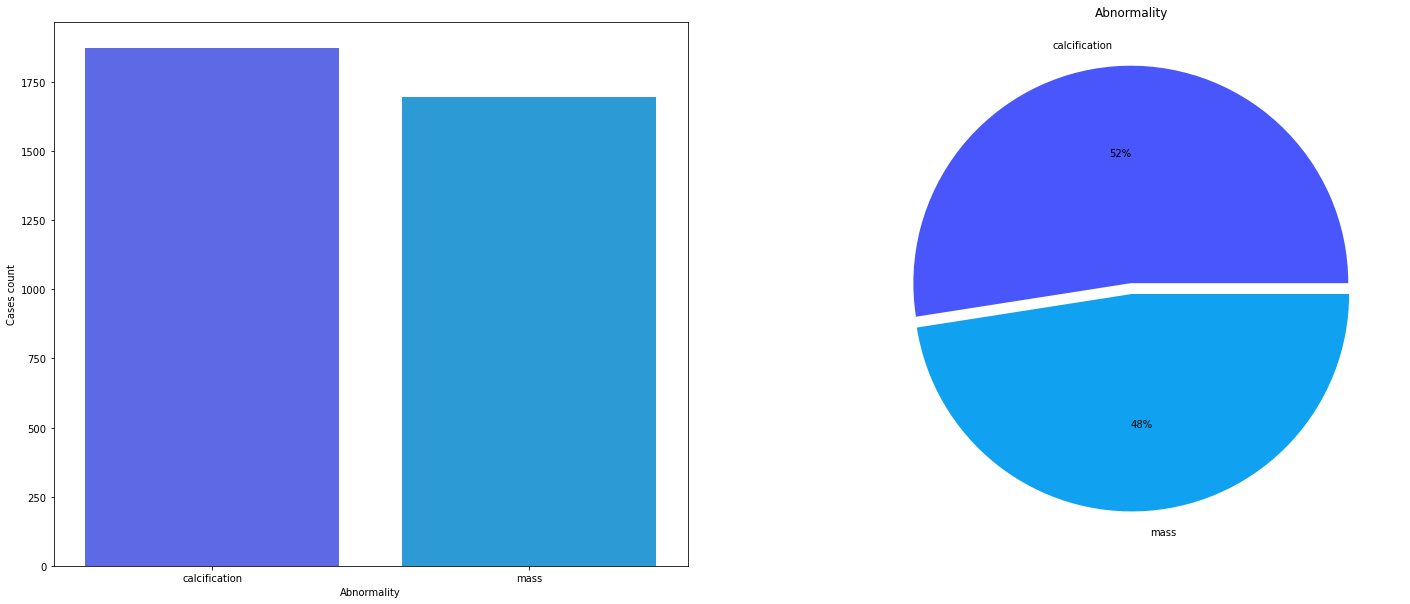

In [7]:
plt.figure(figsize=(25, 10))
palette = sns.color_palette("rainbow", 8)


abnormality_insight = df_all_cases["abnormality type"].value_counts()

plt.subplot(1, 2, 1)
sns.barplot(data=df_all_cases, x=abnormality_insight.index, y=abnormality_insight.values, palette=palette)
plt.xlabel('Abnormality')
plt.ylabel('Cases count')

plt.subplot(1, 2, 2)

plt.pie(data=df_all_cases,  x=abnormality_insight.values, labels=abnormality_insight.index, autopct='%.0f%%', colors=palette, explode = [0.05,0])
plt.title("Abnormality")


plt.show()


# Visualize the position and image view of the breast

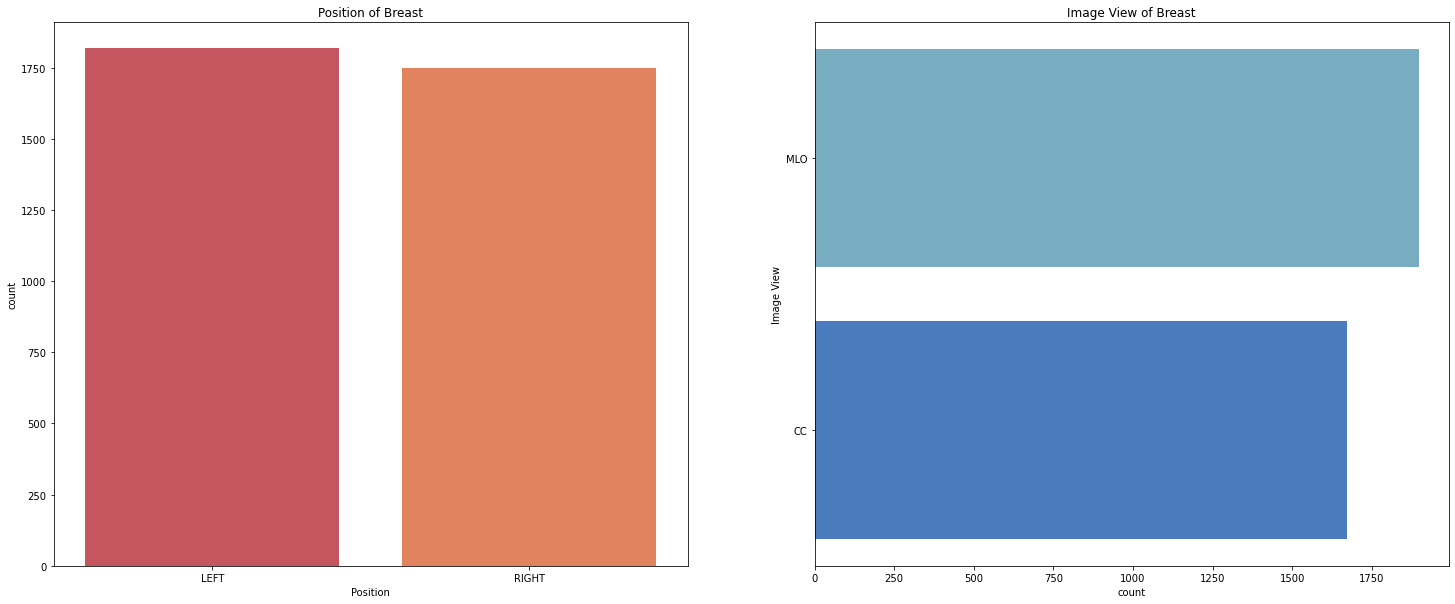

In [8]:
plt.figure(figsize=(25, 10))
palette = sns.color_palette("Spectral", 8)

plt.subplot(1, 2, 1)
breat_type = df_all_cases['left or right breast'].value_counts()

sns.barplot(x=breat_type.index, y=breat_type.values, palette=palette)
plt.xlabel('Position')
plt.ylabel('count')
plt.title("Position of Breast")


plt.subplot(1, 2, 2)
palette = sns.color_palette("icefire", 8)

image_view = df_all_cases['image view'].value_counts()

sns.barplot(y=image_view.index, x=image_view.values, palette=palette)
plt.xlabel('count')
plt.ylabel('Image View')
plt.title("Image View of Breast")

plt.show()

###Visualize Benign vs Benign without Callback vs Malignant

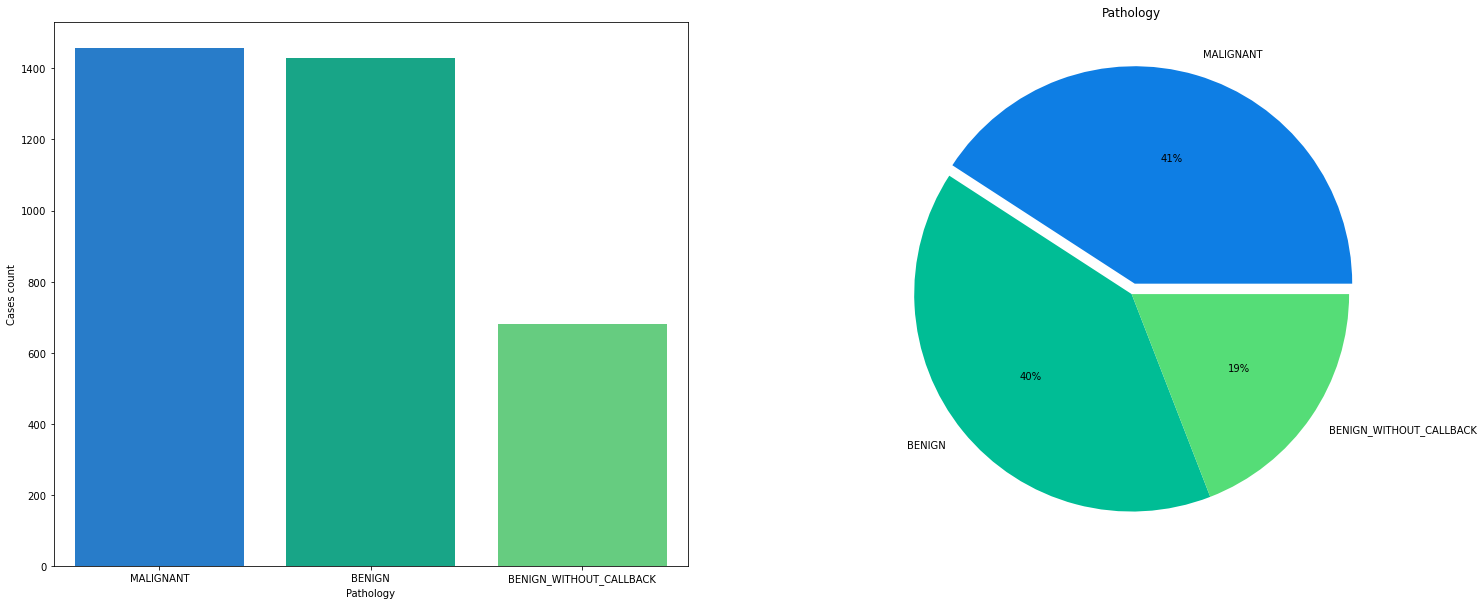

In [9]:
plt.figure(figsize=(25, 10))
palette = sns.color_palette("terrain", 8)


pathalogy_insight = df_all_cases["pathology"].value_counts()

plt.subplot(1, 2, 1)
sns.barplot(data=df_all_cases, x=pathalogy_insight.index, y=pathalogy_insight.values, palette=palette)
plt.xlabel('Pathology')
plt.ylabel('Cases count')

plt.subplot(1, 2, 2)

plt.pie(data=df_all_cases,  x=pathalogy_insight.values, labels=pathalogy_insight.index, autopct='%.0f%%', colors=palette, explode = [0.05,0,0])
plt.title("Pathology")


plt.show()


# Visualize different Types of Calcification

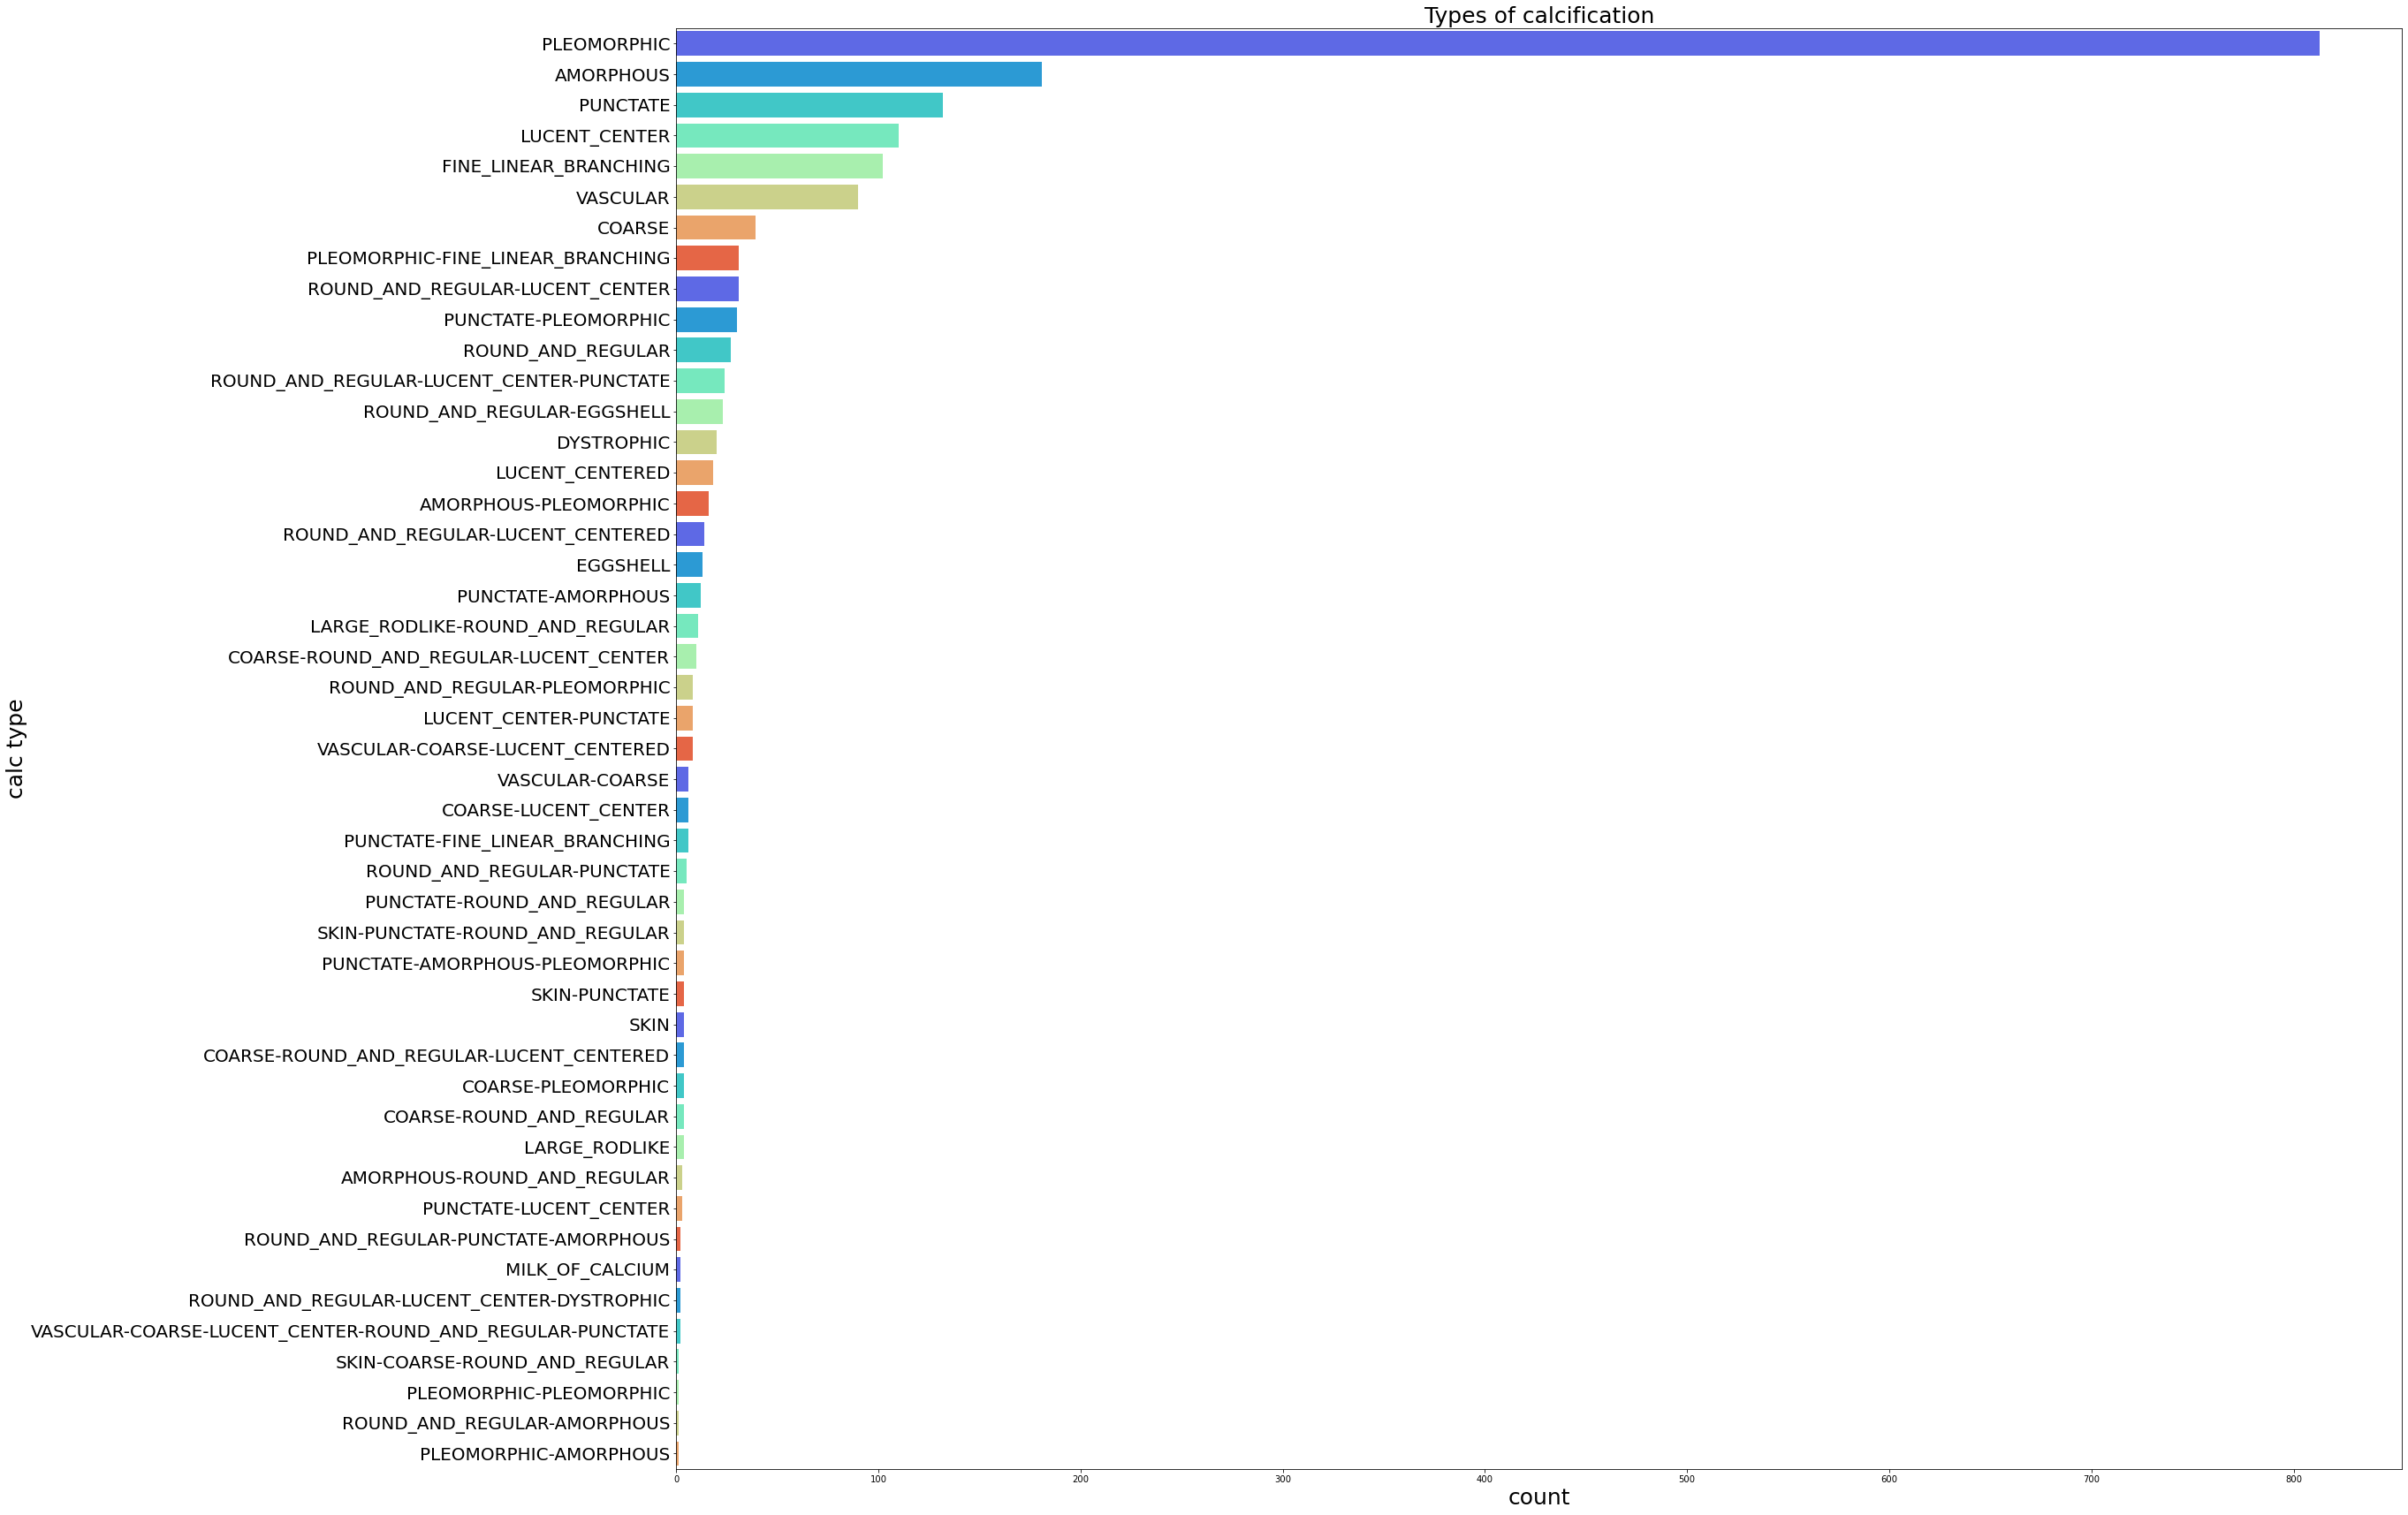

In [10]:
plt.figure(figsize=(35, 30))
palette = sns.color_palette("rainbow", 8)

calc_type = df_all_cases['calc type'].value_counts()

sns.barplot(y=calc_type.index, x=calc_type.values, palette=palette)
plt.ylabel('calc type')

plt.xlabel('count', fontsize=25)
plt.ylabel('calc type', fontsize=25)

plt.xlabel('count')
plt.title("Types of calcification", fontsize=25)
plt.yticks(fontsize=20)
plt.show()


#Visualize different Shapes of Mass

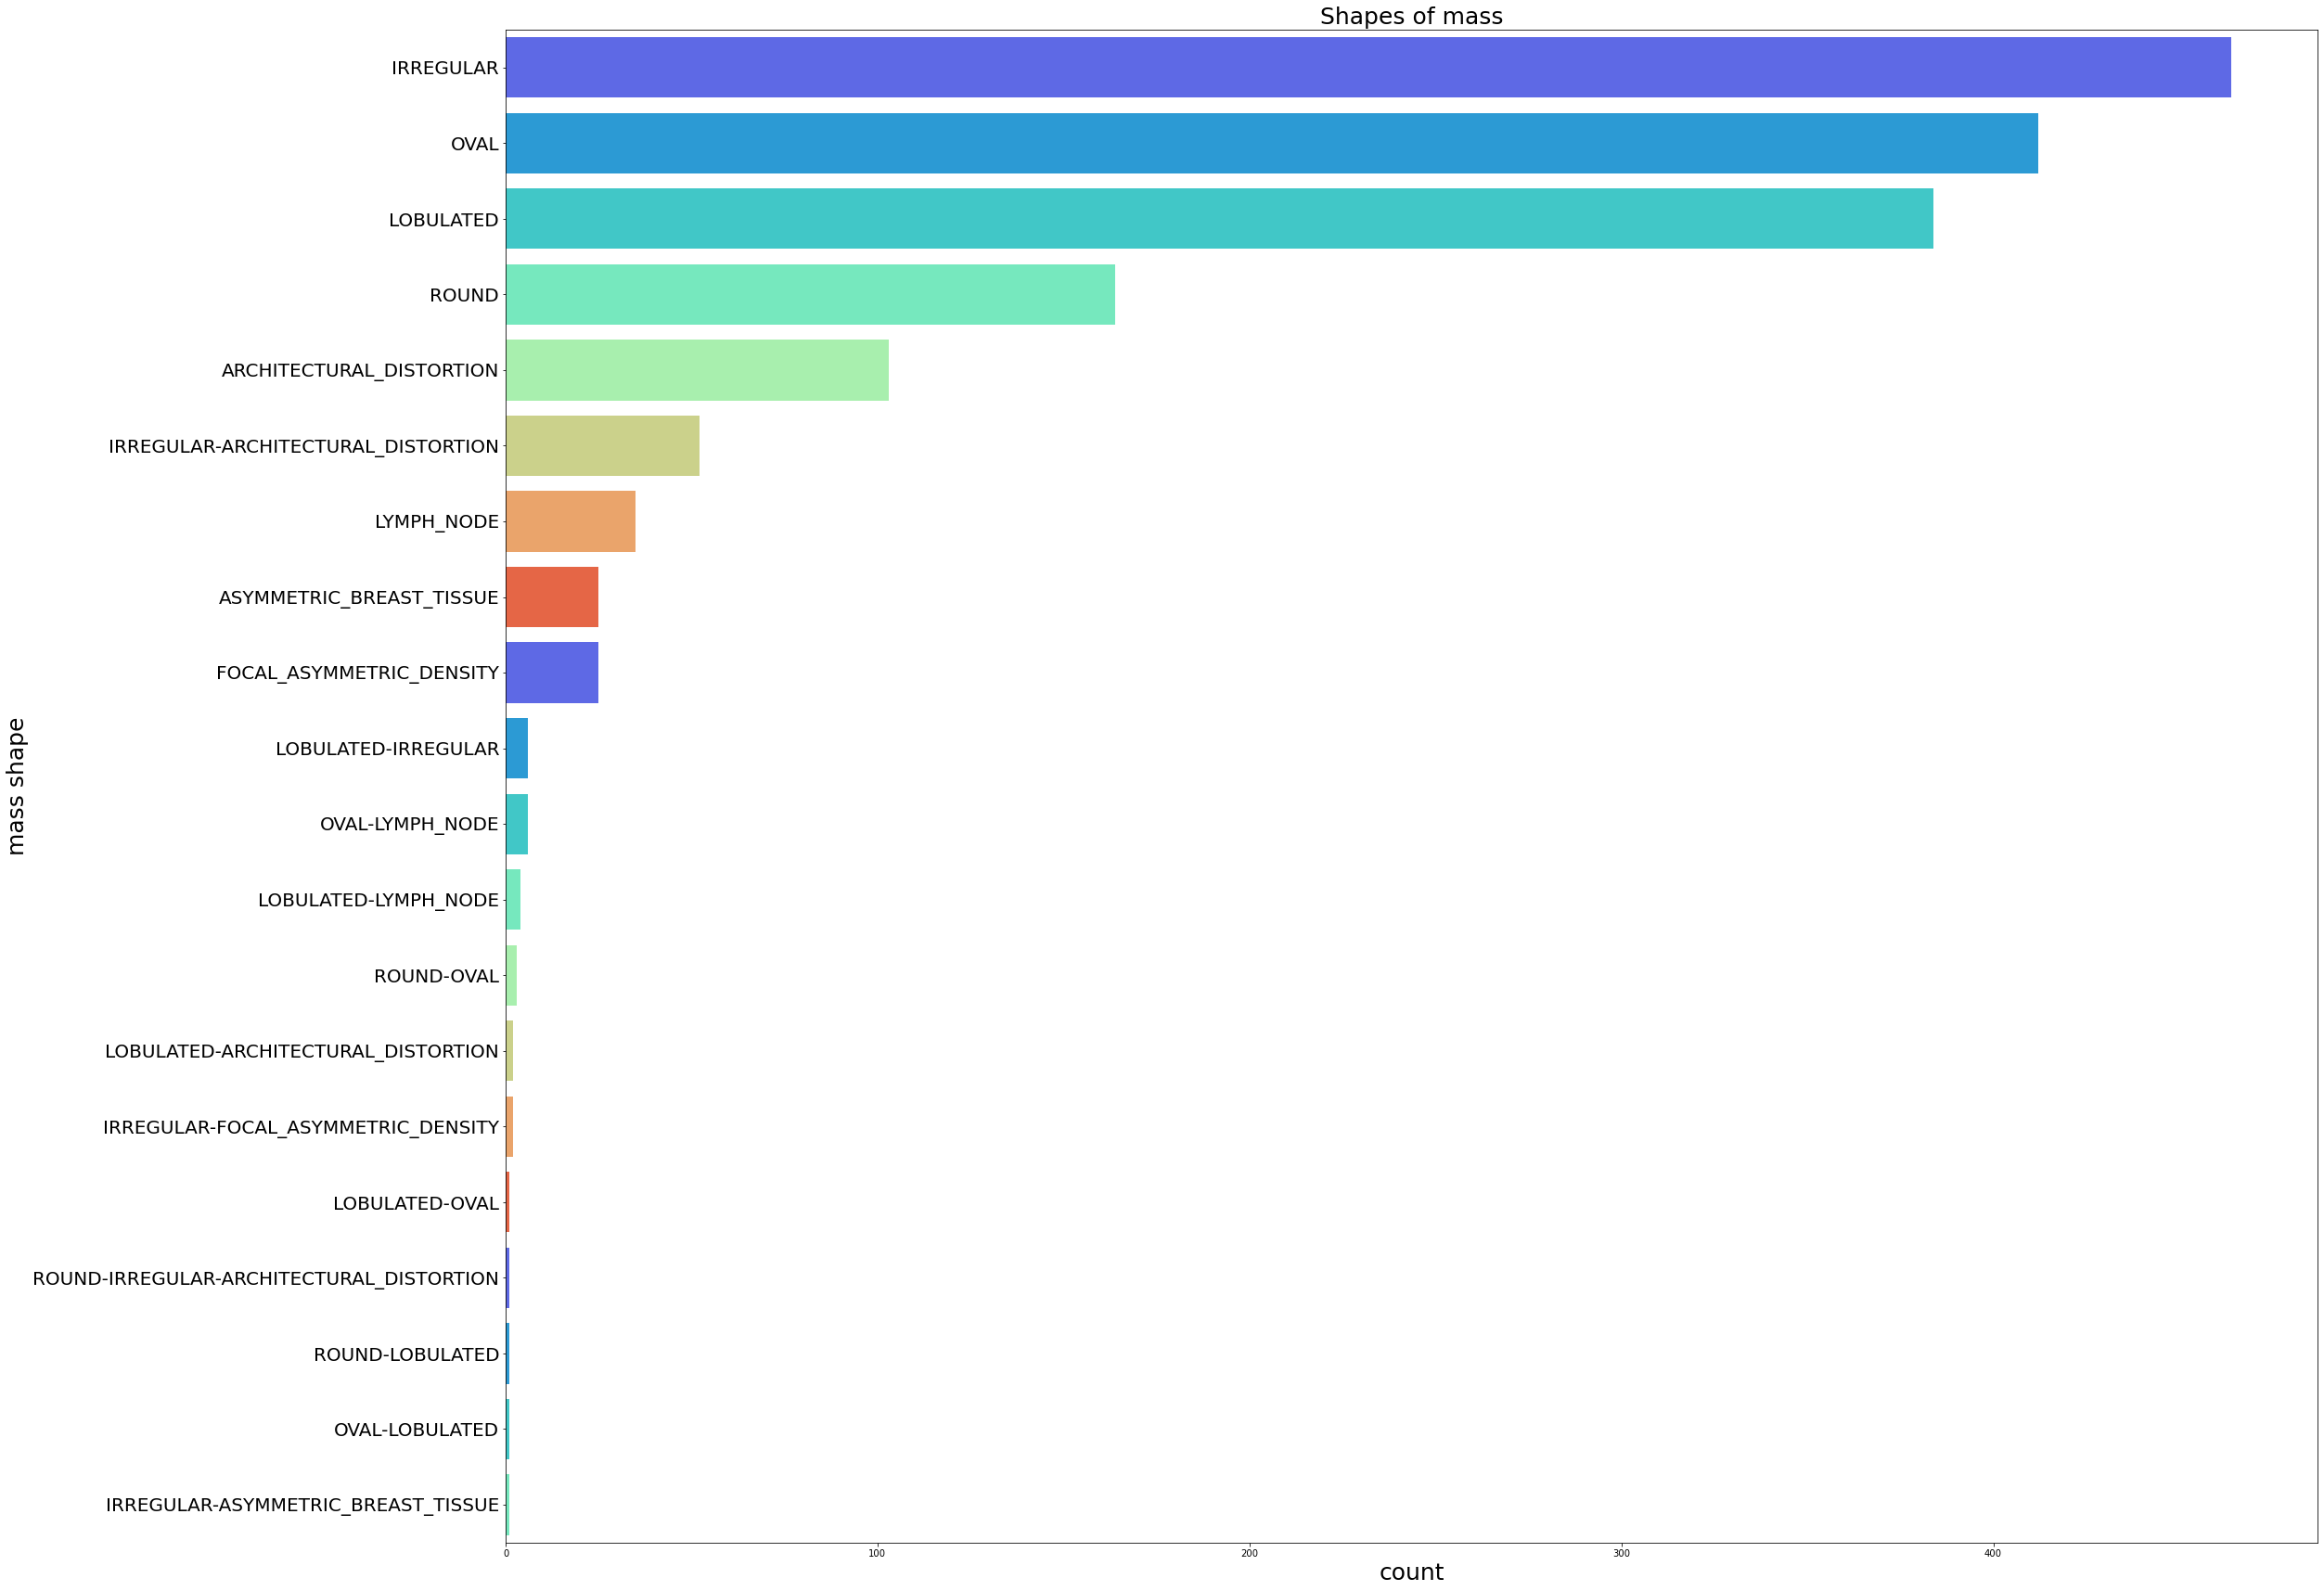

In [11]:
plt.figure(figsize=(35, 30))
palette = sns.color_palette("rainbow", 8)

mass_shape = df_all_cases['mass shape'].value_counts()

sns.barplot(y=mass_shape.index, x=mass_shape.values, palette=palette)
plt.ylabel('mass shape', fontsize=25)
plt.xlabel('count', fontsize=25)
plt.title("Shapes of mass", fontsize=25)
plt.yticks(fontsize=20)
plt.show()

# Mammography Visualization

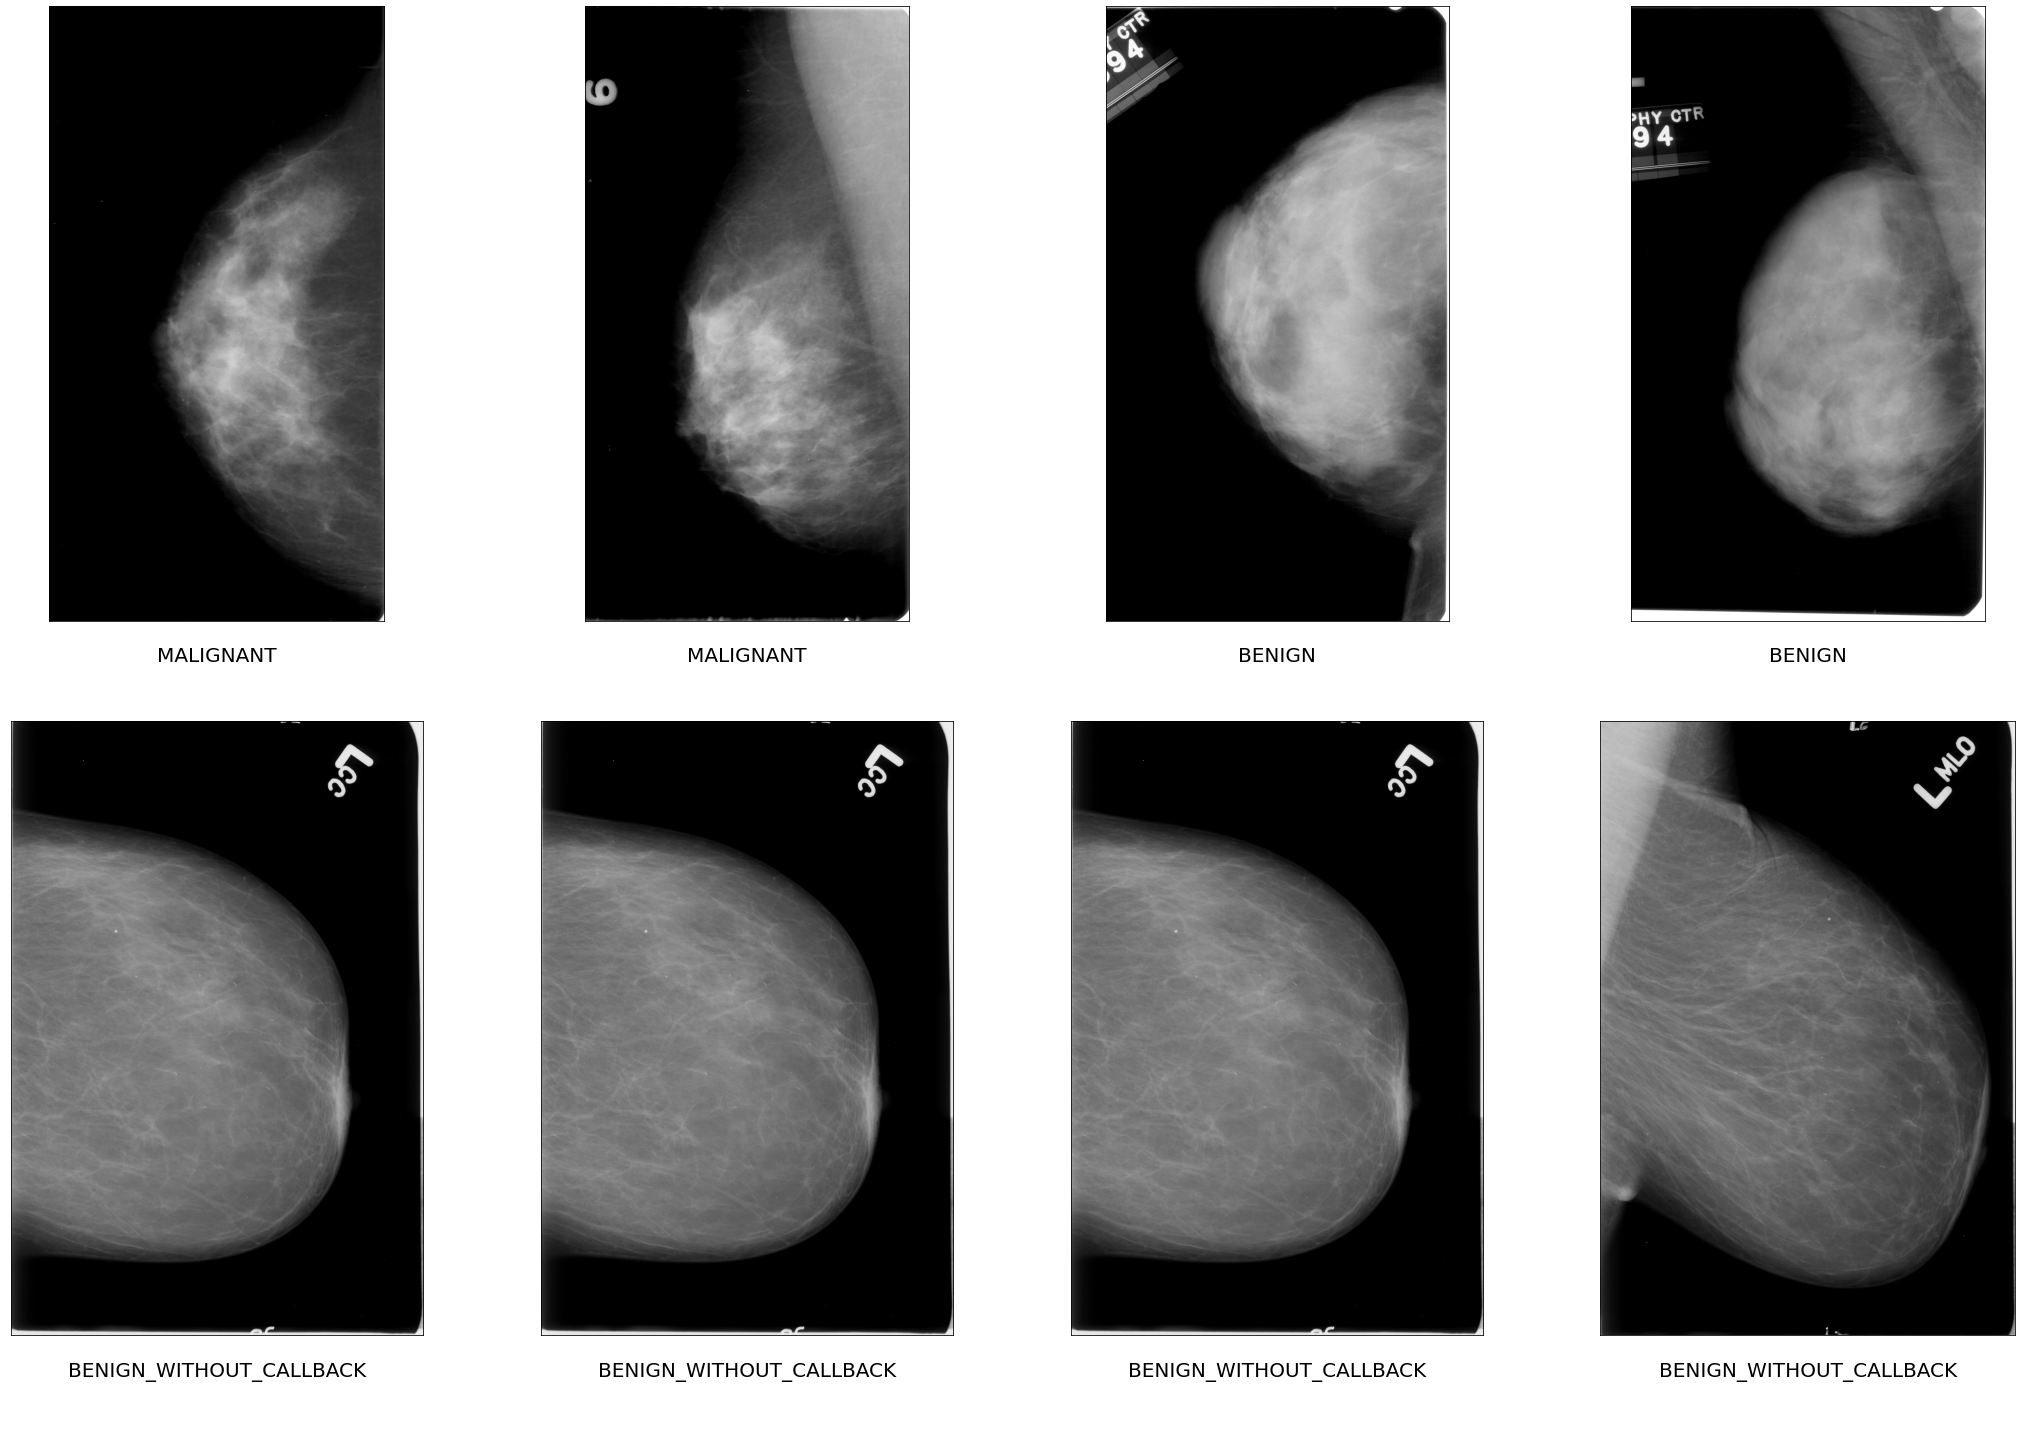

In [15]:
import os
plt.figure(figsize=(30, 20)) # define the plot size


for i in range(8):
    img = plt.imread(os.path.join("/home/suman/Downloads/Red/archive/k_CBIS-DDSM/jpg_img/", df_all_cases["jpg_fullMammo_img_path"].iloc[i].split("/", 1)[1]))
    
    plt.subplot(2, 4, i+1) # subplot of the images 2 row and 4 columns with plt index of 0, 1, 2, 3,...
    plt.xticks([]), plt.yticks([]) # remove the axis from the plt
    plt.xlabel("\n"+str(df_all_cases["pathology"].iloc[i]+"\n\n"), fontsize=20) # print the class label i.e Malignant or Benign
    
    plt.imshow(img, cmap='gray') # show the image
plt.tight_layout()
plt.show()  